In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None) # Todas as colunas
pd.set_option('display.max_rows', None) # Todas as linhas
pd.options.display.float_format = '{:.2f}'.format

In [183]:
# Carregando o arquivo CSV

df_original = pd.read_csv('/Users/ryan.oliveira/Desktop/puc/ppl-cd-pcd-sist-int-2025-1-grupo-5-2025-1/assets/data/state_idh_pib.csv') #Dataframe

In [184]:
# Verificando as colunas e primeiras linhas
df_original.head()

,Idade,Faixa de idade,Genero,Cor/Raça/Etnia,PDC,Estado_onde_mora,Uf,Regiao_onde_mora,Mudou_de_estado,Regiao_de_Origem,Nivel_de_Ensino,Area_de_Formacao,Situacao_atual_de_trabalho,Setor,Num_func_empresa_que_trabalha,Cargo_Atual,Nível,Faixa_Salarial,Salario_Medio,Tempo_de_experiencia_na_area_de_dados,Atual_forma_de_trabalho,Papeis/cargos_do_time/chapter_de_dados,Analytics_Engineer,Engenharia_de_Dados/Data_Engineer,Analista_de_Dados/Data_Analyst,Cientista_de_Dados/Data_Scientist,Database_Administrator/DBA,Analista_de_Business_Intelligence/BI,Arquiteto_de_Dados/Data_Architect,Data_Product_Manager/DPM,Business_Analyst,SQL,R,Python,C/C++/C#,NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,Rust,PHP,JavaScript,Não utilizo nenhuma linguagem,Azure (Microsoft),Amazon Web Services (AWS),Google Cloud (GCP),Oracle Cloud,IBM,Servidores On Premise/Não utilizamos Cloud,Cloud Própria,Microsoft PowerBI,Qlik View/Qlik Sense,Tableau,Metabase,Superset,Redash,Looker,Looker Studio(Google Data Studio),Amazon Quicksight,Mode,Alteryx,MicroStrategy,IBM Analytics/Cognos,SAP Business Objects/SAP Analytics,Oracle Business Intelligence,Salesforce/Einstein Analytics,Birst,SAS Visual Analytics,Grafana,TIBCO Spotfire,Pentaho,Fazemos todas as análises utilizando apenas Excel ou planilhas do google,Não utilizo nenhuma ferramenta de BI no trabalho,IDHM,PIB_2021_OR
0,31,30-34,Masculino,Branca,Não,Minas Gerais (MG),MG,Sudeste,1.00,NaN,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,14000.50,de 3 a 4 anos,Modelo híbrido flexível (o funcionário tem lib...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.77,857593.00
1,30,30-34,Masculino,Branca,Não,Espírito Santo (ES),ES,Sudeste,1.00,NaN,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,de 101 a 500,Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,7000.50,de 3 a 4 anos,Modelo 100% remoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77,186337.00
2,37,35-39,Feminino,Amarela,Não,São Paulo (SP),SP,Sudeste,1.00,NaN,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,7000.50,de 1 a 2 anos,Modelo híbrido flexível (o funcionário tem lib...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.81,2719751.00
3,22,22-24,Masculino,Preta,Não,São Paulo (SP),SP,Sudeste,1.00,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81,2719751.00
4,34,30-34,Masculino,Branca,Não,Minas Gerais (MG),MG,Sudeste,1.00,NaN,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Outra Opção,de 101 a 500,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,5000.50,Menos de 1 ano,Modelo 100% remoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0

In [185]:
# Verificando as dimensões do CSV. 
df_original.shape

(5293, 78)

In [186]:
# Verificando informações do arquivo
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 78 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Idade                                                                     5293 non-null   int64  
 1   Faixa de idade                                                            5293 non-null   object 
 2   Genero                                                                    5293 non-null   object 
 3   Cor/Raça/Etnia                                                            5293 non-null   object 
 4   PDC                                                                       5293 non-null   object 
 5   Estado_onde_mora                                                          5172 non-null   object 
 6   Uf                                                              

In [187]:
# Todas as colunas com seus tipos de dados correspondente
print(df_original.dtypes)

Idade                                                                         int64
Faixa de idade                                                               object
Genero                                                                       object
Cor/Raça/Etnia                                                               object
PDC                                                                          object
Estado_onde_mora                                                             object
Uf                                                                           object
Regiao_onde_mora                                                             object
Mudou_de_estado                                                             float64
Regiao_de_Origem                                                             object
Nivel_de_Ensino                                                              object
Area_de_Formacao                                                            

In [188]:
# Descrição do DataFrame
df_original.describe() 

,Idade,Mudou_de_estado,Salario_Medio,Analytics_Engineer,Engenharia_de_Dados/Data_Engineer,Analista_de_Dados/Data_Analyst,Cientista_de_Dados/Data_Scientist,Database_Administrator/DBA,Analista_de_Business_Intelligence/BI,Arquiteto_de_Dados/Data_Architect,Data_Product_Manager/DPM,Business_Analyst,SQL,R,Python,C/C++/C#,NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,Rust,PHP,JavaScript,Não utilizo nenhuma linguagem,Azure (Microsoft),Amazon Web Services (AWS),Google Cloud (GCP),Oracle Cloud,IBM,Servidores On Premise/Não utilizamos Cloud,Cloud Própria,Microsoft PowerBI,Qlik View/Qlik Sense,Tableau,Metabase,Superset,Redash,Looker,Looker Studio(Google Data Studio),Amazon Quicksight,Mode,Alteryx,MicroStrategy,IBM Analytics/Cognos,SAP Business Objects/SAP Analytics,Oracle Business Intelligence,Salesforce/Einstein Analytics,Birst,SAS Visual Analytics,Grafana,TIBCO Spotfire,Pentaho,Fazemos todas as análises utilizando apenas Excel ou planilhas do google,Não utilizo nenhuma ferramenta de BI no trabalho,IDHM,PIB_2021_OR
count,5293.00,5172.00,4651.00,859.00,859.00,859.00,859.00,859.00,859.00,859.00,859.00,859.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3613.00,3613.00,3613.00,3613.00,3613.00,3613.00,3613.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,3772.00,5169.00,5169.00
mean,32.00,0.79,10028.68,0.32,0.65,0.68,0.62,0.22,0.55,0.32,0.24,0.40,0.84,0.11,0.75,0.02,0.01,0.09,0.00,0.04,0.08,0.03,0.01,0.00,0.01,0.07,0.08,0.42,0.31,0.32,0.04,0.01,0.16,0.07,0.57,0.05,0.19,0.09,0.02,0.02,0.24,0.17,0.04,0.00,0.03,0.01,0.01,0.02,0.01,0.02,0.00,0.02,0.07,0.01,0.05,0.10,0.11,0.78,1409338.33
std,7.62,0.40,6969.22,0.47,0.48,0.47,0.48,0.42,0.50,0.47,0.43,0.49,0.37,0.31,0.43,0.13,0.10,0.29,0.05,0.20,0.26,0.18,0.09,0.04,0.12,0.26,0.27,0.49,0.46,0.46,0.20,0.11,0.37,0.25,0.49,0.22,0.39,0.28,0.15,0.13,0.43,0.38,0.19,0.06,0.16,0.10,0.08,0.14,0.11,0.15,0.04,0.15,0.26,0.08,0.21,0.30,0.31,0.03,1095698.96
min,18.00,0.00,1050.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,20100.00
25%,27.00,1.00,5000.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.76,428571.00
50%,30.00,1.00,10000.50,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77,857593.00
75%,36.00,1.00,14000.50,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,2719751.00
max,73.00,1.00,35000.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.81,2719751.00


In [189]:
# Dados únicos do DataFrame de salário médio
df_original['Salario_Medio'].unique()

array([14000.5,  7000.5,     nan,  5000.5, 10000.5, 22500.5,  1500.5,
        3500.5, 18000.5,  2500.5, 27500.5, 35000.5,  1050.5])

In [190]:
# Quantidade de valores por salário médio
df_original['Salario_Medio'].value_counts()

Salario_Medio
10000.50    1026
5000.50      745
14000.50     650
7000.50      637
3500.50      352
18000.50     328
2500.50      288
1500.50      215
22500.50     195
27500.50     128
35000.50      86
1050.50        1
Name: count, dtype: int64

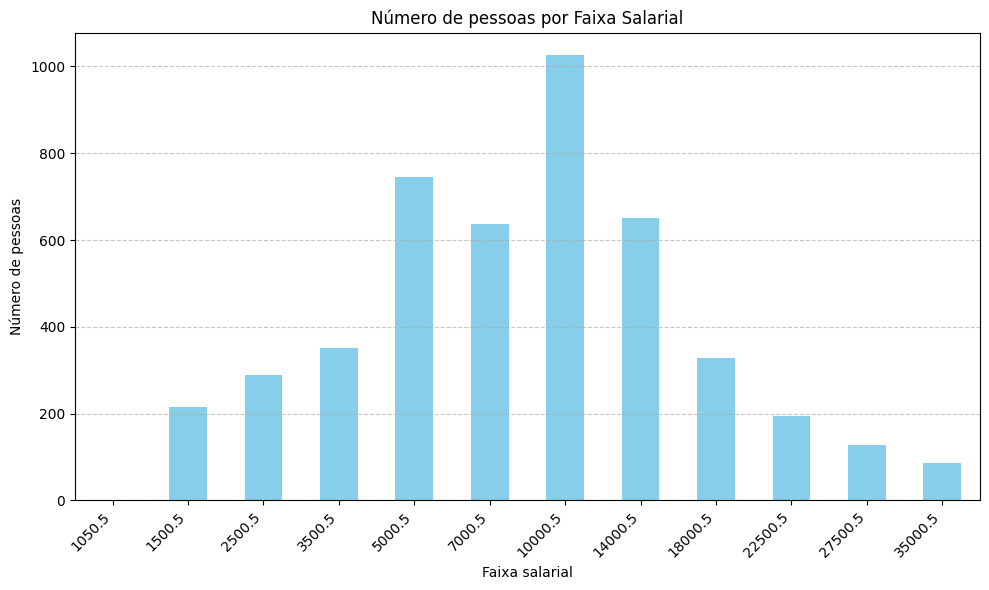

In [191]:
# Plot número de pessoas por faixa salarial
contagem_faixas = df_original['Salario_Medio'].value_counts() # Conta ocorrências de cada faixa salarial
contagem_faixas = contagem_faixas.sort_index() # Ordenação das faixas salariais 

plt.figure(figsize=(10, 6))
contagem_faixas.plot(kind='bar', color='skyblue')
plt.title('Número de pessoas por Faixa Salarial')
plt.xlabel('Faixa salarial')
plt.ylabel('Número de pessoas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Evitar sobreposição
plt.show()

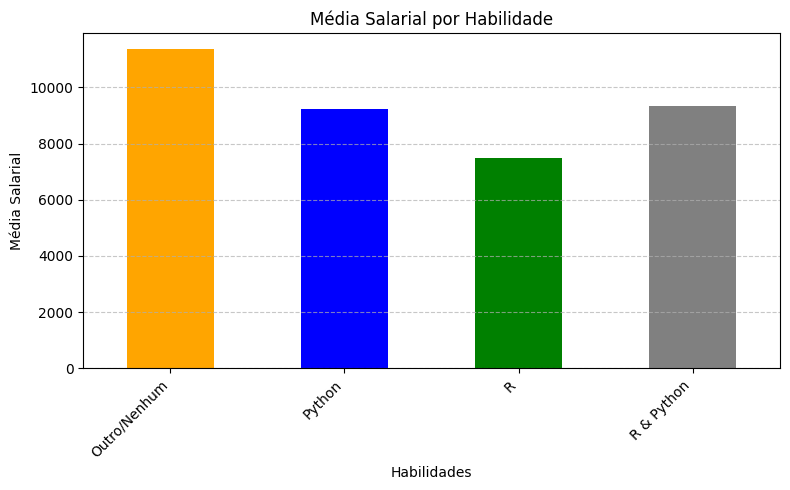

In [192]:
# Python x R
def categorizacao_python_r(row):
    if row['R'] > 0 and row['Python'] > 0:
        return 'R & Python'
    elif row['R'] > 0:
        return 'R'
    elif row['Python'] > 0:
        return 'Python'
    else:
        return 'Outro/Nenhum'

df_original['Python_ou_R'] = df_original.apply(categorizacao_python_r, axis=1) # Adicione uma nova coluna ao DataFrame que categoria o trabalhador. 'Axis = 1' => Linha por linha

# Calcular a média salarial para cada categoria
media_salariais = df_original.groupby('Python_ou_R')['Salario_Medio'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
media_salariais.plot(kind='bar', color=['orange', 'blue', 'green', 'gray'])
plt.title('Média Salarial por Habilidade')
plt.xlabel('Habilidades')
plt.ylabel('Média Salarial')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibe o gráfico
plt.show()

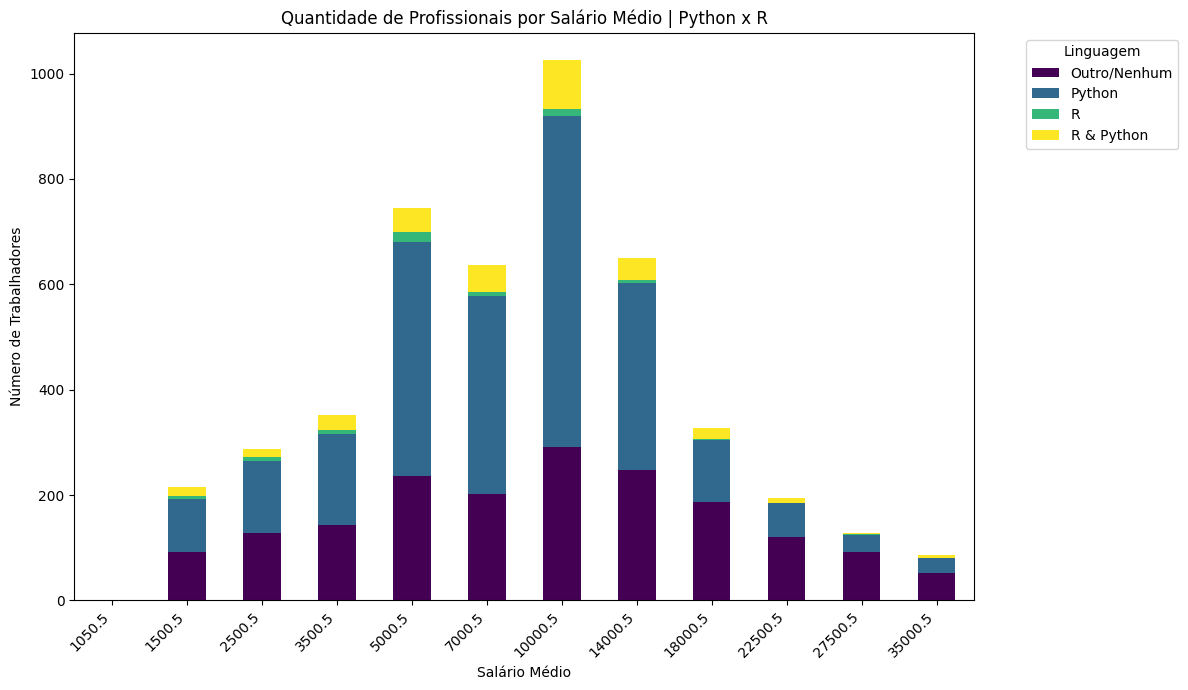

In [ ]:
# Quantidade de profissionais por salário médio que trabalham com Python oy R

ocorrencias_por_salario = df_original.groupby(['Salario_Medio', 'Python_ou_R']).size().unstack() # Unstack() - Cada categoria torna uma coluna

ocorrencias_por_salario.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Quantidade de Profissionais por Salário Médio | Python x R')
plt.xlabel('Salário Médio')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Linguagem', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

De acordo com o gráfico acima, é possível observar alguns pontos:
1. Há uma baixa adesão das duas linguagens de programação entre os salários médio de R\$ 1050,5 a R\$ 2500,5;
2. Dessa forma, é possível observar que na medida em que o salário médio vai aumentando, percebe-se que o número de pessoas que trabalham com linguagem de programação é maior, especialmente em faixas como R\$ 5000,5 e R\$ 7000,50;
3. A linguagem Python é mais comum que R entre as faixas salariais;
4. Há a presença de profisisonais que trabalham com ambas linguagens em todas as faixas, entretanto, não parece ser algo muito comum.